In [1]:
import numpy as np
import pandas as pd
import bson
import os
import io
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from skimage.data import imread

In [2]:
data_dir = "../input/"
image_dir="../output/"

train_bson_path = os.path.join(data_dir, "train.bson")
num_train_products = 7069896
base_dir = os.path.join(os.getcwd())
# train_bson_path = os.path.join(data_dir, "train_example.bson")
# num_train_products = 82

test_bson_path = os.path.join(data_dir, "test.bson")
example_bson_path=os.path.join(data_dir,"train_example.bson")  

In [25]:
categories_path = os.path.join(data_dir, "category_names.csv")
categories_df = pd.read_csv(categories_path)

# Maps the category_id to an integer index. This is what we'll use to
# one-hot encode the labels.
categories_df.head()

,category_id,category_level1,category_level2,category_level3
0,1000021794,ABONNEMENT / SERVICES,CARTE PREPAYEE,CARTE PREPAYEE MULTIMEDIA
1,1000012764,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI FUMEUR
2,1000012776,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI VELO - ABRI MOTO
3,1000012768,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,FONTAINE A EAU
4,1000012755,AMENAGEMENT URBAIN - VOIRIE,SIGNALETIQUE,PANNEAU D'INFORMATION EXTERIEUR


In [13]:
import cv2
def read_bson(path):
    data=bson.decode_file_iter(open(path,'rb'))
    category_id=[]
    images=[]
    dict_id=[]
    for i,j in enumerate(data):
        category=j['category_id']
        product_id=j['_id']
        dict_id.append(product_id)
        category_id.append(j['category_id'])
        images.append(len(j['imgs']))
    return(images, category_id, dict_id)
            

In [14]:
image,category, no_dict=read_bson(example_bson_path)

In [18]:
print("The train_example file has ",len(no_dict),"objects,",sum(image),"images","belonging to",len(set(category)),"categories")

The train_example file has  82 objects, 110 images belonging to 36 categories


In [17]:
train_imges,train_categories,no_train_dict=read_bson(train_bson_path)

In [20]:
print("The train_example file has ",len(no_train_dict),"objects,",sum(train_imges),"images","belonging to",len(set(train_categories)),"categories")

The train_example file has  7069896 objects, 12371293 images belonging to 5270 categories


In [21]:
dta_dict={'categories':train_categories,'no_images':train_imges}
analysis=pd.DataFrame(dta_dict)
analysis.head()

,categories,no_images
0,1000010653,1
1,1000010653,1
2,1000004079,1
3,1000004141,1
4,1000015539,1


In [22]:
categories=list(set(analysis['categories']))

In [23]:
total_images=[]
for i in categories:
    total_images.append(np.sum(analysis['no_images'][analysis['categories']==i]))

In [24]:
final_dict={'categories':categories,'no_images':total_images}
final_df=pd.DataFrame(final_dict)
final_df.head()

,categories,no_images
0,1000005633,2209
1,1000013826,75
2,1000005635,173
3,1000005637,166
4,1000013830,349


**Visualising the images per category plot
Lets plot the number of images per category plot as below.
The beow plot shows us that there are 7 categories which have maximum number of images and remaining categories have approximately equal number of images**

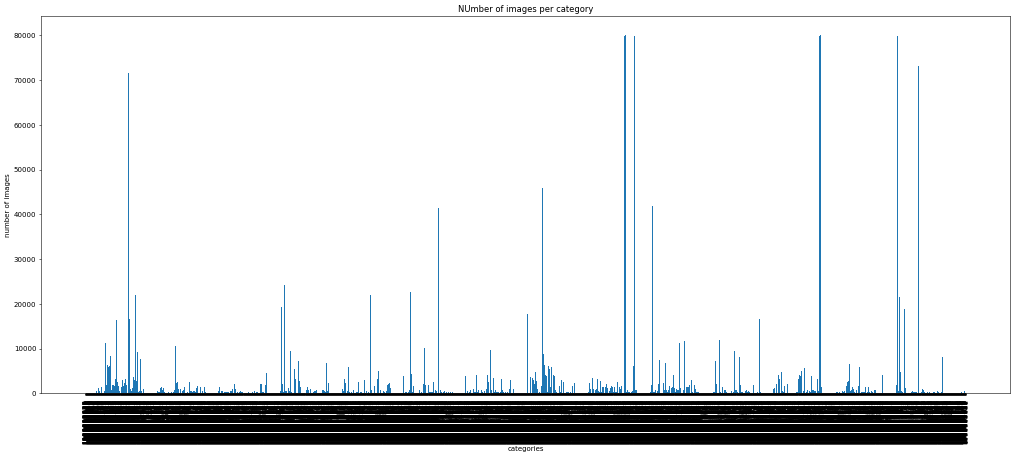

In [25]:
n=np.array(range(5270))
plt.figure(num=None, figsize=(25, 10), dpi=50)
plt.bar(n,final_df['no_images'])
plt.xticks(n,final_df['categories'], rotation='vertical')
plt.title('NUmber of images per category')
plt.xlabel('categories')
plt.ylabel('number of images', rotation='vertical')

In [21]:
data_example=bson.decode_file_iter(open(example_bson_path,'rb'))
images=[]
category_explore=[]
for i,j in enumerate(data_example):
    for a,b in enumerate(j['imgs']):
        category_explore.append(j['category_id'])
        images.append(imread(io.BytesIO(b['picture'])))

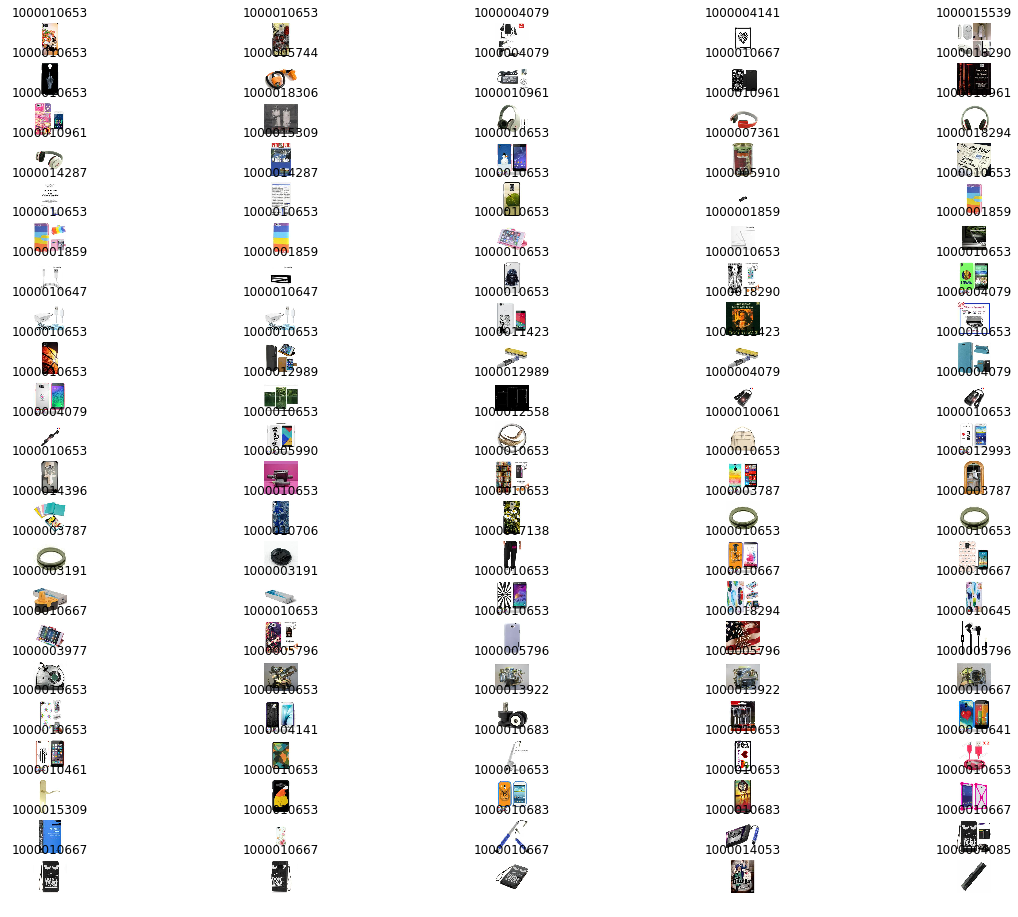

In [35]:
a,b=plt.subplots(22,5, figsize=(20,16))
b = b.flatten()
for i,ax in enumerate(b):
    ax.imshow(images[i])
    ax.set_title(category_explore[i])
    ax.axis('off')
plt.show()